# Python科学计算-numpy

###### 在 NumPy 里有两个重要的对象：ndarray（N-dimensional array object）解决了多维数组问题，而 ufunc（universal function object）则是解决对数组进行处理的函数

### ndarray对象

ndarray 实际上是多维数组的含义。在 NumPy 数组中，维数称为秩（rank），一维数组的秩为 1，二维数组的秩为 2，以此类推。在 NumPy 中，每一个线性的数组称为一个轴（axes），其实秩就是描述轴的数量。

### 创建数组

In [3]:
import numpy as np
# ndarray使用
def work1():
    a = np.array([1, 2, 3])
    b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    b[1,1]=10
    print(a.shape)
    print(b.shape)
    print(a.dtype)
    print(b)

In [4]:
work1()

(3,)
(3, 3)
int32
[[ 1  2  3]
 [ 4 10  6]
 [ 7  8  9]]


创建数组前，你需要引用 NumPy 库，可以直接通过 array 函数创建数组，如果是多重数组，比如示例里的 b，那么该怎么做呢？你可以先把一个数组作为一个元素，然后嵌套起来，比如示例 b 中的[1,2,3]就是一个元素，然后[4,5,6][7,8,9]也是作为元素，然后把三个元素再放到[]数组里，赋值给变量 b。

当然数组也是有属性的，比如你可以通过函数 shape 属性获得数组的大小，通过 dtype 获得元素的属性。如果你想对数组里的数值进行修改的话，直接赋值即可，注意下标是从 0 开始计的，所以如果你想对 b 数组，九宫格里的中间元素进行修改的话，下标应该是[1,1]。

### 结构数组

In [5]:
# 结构化数组的使用
def work2():
    persontype = np.dtype({'names':['name', 'age', 'chinese', 'math', 'english'], 
                           'formats':['S32','i', 'i', 'i', 'f']})
    peoples = np.array([("ZhangFei",32,75,100, 90),("GuanYu",24,85,96,88.5), 
                        ("ZhaoYun",28,85,92,96.5),("HuangZhong",29,65,85,100)], dtype=persontype)
    print(peoples)
    ages = peoples['age']
    chineses = peoples['chinese']
    maths = peoples['math']
    englishs = peoples['english']
    print(np.mean(ages))
    print(np.mean(chineses))
    print(np.mean(maths))
    print(np.mean(englishs))

work2()

[(b'ZhangFei', 32, 75, 100,  90. ) (b'GuanYu', 24, 85,  96,  88.5)
 (b'ZhaoYun', 28, 85,  92,  96.5) (b'HuangZhong', 29, 65,  85, 100. )]
28.25
77.5
93.25
93.75


首先在 NumPy 中是用 dtype 定义的结构类型，然后在定义数组的时候，用 array 中指定了结构数组的类型 dtype=persontype，这样你就可以自由地使用自定义的 persontype 了。比如想知道每个人的语文成绩，就可以用 chineses = peoples[:][‘chinese’]，当然 NumPy 中还有一些自带的数学运算，比如计算平均值使用 np.mean。

### ufunc 运算

 ufunc 是 universal function 的缩写。确如其名，它能对数组中每个元素进行函数操作。NumPy 中很多 ufunc 函数计算速度非常快，因为都是采用 C 语言实现的。

###### 连续数组的创建

In [6]:
x1 = np.arange(1,11,2)
x2 = np.linspace(1,9,5)
print(x1)
print(x2)

[1 3 5 7 9]
[1. 3. 5. 7. 9.]


np.arange 和 np.linspace 起到的作用是一样的，都是创建等差数组。这两个数组的结果 x1,x2 都是[1 3 5 7 9]。结果相同，但是你能看出来创建的方式是不同的。

arange() 类似内置函数 range()，通过指定初始值、终值、步长来创建等差数列的一维数组，默认是不包括终值的。

linspace 是 linear space 的缩写，代表线性等分向量的含义。linspace() 通过指定初始值、终值、元素个数来创建等差数列的一维数组，默认是包括终值的

### 算数运算

###### 通过 NumPy 可以自由地创建等差数组，同时也可以进行加、减、乘、除、求 n 次方和取余数。

In [7]:
# 连续数组的创建：arange 或 linspace
x1 = np.arange(1,11,2)
x2 = np.linspace(1,9,5)
print('x1=', x1)
print('x2=', x2)

print(np.add(x1, x2)) # 加 
print(np.subtract(x1, x2))  # 减
print(np.multiply(x1, x2))  # 乘
print(np.divide(x1, x2))  # 除
print(np.power(x1, x2))  # 求n次方
print(np.remainder(x1, x2))  # 取余数

x1= [1 3 5 7 9]
x2= [1. 3. 5. 7. 9.]
[ 2.  6. 10. 14. 18.]
[0. 0. 0. 0. 0.]
[ 1.  9. 25. 49. 81.]
[1. 1. 1. 1. 1.]
[1.00000000e+00 2.70000000e+01 3.12500000e+03 8.23543000e+05
 3.87420489e+08]
[0. 0. 0. 0. 0.]


求这两个数组之间的加、减、乘、除、求 n 次方和取余数。在 n 次方中，x2 数组中的元素实际上是次方的次数，x1 数组的元素为基数。在取余函数里，你既可以用 np.remainder(x1, x2)，也可以用 np.mod(x1, x2)，结果是一样的。

### 统计函数

对数据进行描述性的统计分析，比如了解数据中的最大值、最小值、平均值，是否符合正态分布，方差、标准差多少等等

###### 计数组 / 矩阵中的最大值函数 max()，最小值函数 min()

In [8]:
# 最大、最小值
def work1():
	a = np.array([[1,2,3], [4,5,6], [7,8,9]])
	print(np.min(a))
	print(np.min(a,0))
	print(np.min(a,1))
	print(np.max(a))
	print(np.max(a,0))
	print(np.max(a,1))
work1()

1
[1 2 3]
[1 4 7]
9
[7 8 9]
[3 6 9]


amin() 用于计算数组中的元素沿指定轴的最小值。对于一个二维数组 a，amin(a) 指的是数组中全部元素的最小值，amin(a,0) 是延着 axis=0 轴的最小值，axis=0 轴是把元素看成了[1,4,7], [2,5,8], [3,6,9]三个元素，所以最小值为[1,2,3]，amin(a,1) 是延着 axis=1 轴的最小值，axis=1 轴是把元素看成了[1,2,3], [4,5,6], [7,8,9]三个元素，所以最小值为[1,4,7]。同理 amax() 是计算数组中元素沿指定轴的最大值。

###### 统计数组的百分位数 percentile()

In [9]:
# 统计百分位数
def work2():
	a = np.array([[1,2,3], [4,5,6], [7,8,9]])
	print(np.percentile(a, 50))
	print(np.percentile(a, 50, axis=0))
	print(np.percentile(a, 50, axis=1))
work2()

5.0
[4. 5. 6.]
[2. 5. 8.]


同样，percentile() 代表着第 p 个百分位数，这里 p 的取值范围是 0-100，如果 p=0，那么就是求最小值，如果 p=50 就是求平均值，如果 p=100 就是求最大值。同样你也可以求得在 axis=0 和 axis=1 两个轴上的 p% 的百分位数。

###### 统计数组中的中位数 median()、平均数 mean()

In [10]:
# 中位数、平均数
def work3():
	a = np.array([[1,2,3], [4,5,6], [7,8,9]])
	#求中位数
	print(np.median(a))
	print(np.median(a, axis=0))
	print(np.median(a, axis=1))
	#求平均数
	print(np.mean(a))
	print(np.mean(a, axis=0))
	print(np.mean(a, axis=1))
work3()

5.0
[4. 5. 6.]
[2. 5. 8.]
5.0
[4. 5. 6.]
[2. 5. 8.]


用 median() 和 mean() 求数组的中位数、平均值，同样也可以求得在 axis=0 和 1 两个轴上的中位数、平均值。

###### 统计数组中的加权平均值 average()

In [11]:
# 加权平均值
def work4():
	a = np.array([1,2,3,4])
	weights = np.array([1,2,3,4])
	print(np.average(a))
	print(np.average(a,weights=weights))
work4()

2.5
3.0


average() 函数可以求加权平均，加权平均的意思就是每个元素可以设置个权重，默认情况下每个元素的权重是相同的，所以 np.average(a)=(1+2+3+4)/4=2.5，也可以指定权重数组 wts=[1,2,3,4]，这样加权平均 np.average(a,weights=wts)=(1*1+2*2+3*3+4*4)/(1+2+3+4)=3.0。

###### 统计数组中的标准差 std()、方差 var()

In [12]:
# 标准差、方差
def work5():
	a = np.array([1,2,3,4])
	print(np.std(a))
	print(np.var(a))
work5()

1.118033988749895
1.25


方差的计算是指每个数值与平均值之差的平方求和的平均值，即 mean((x - x.mean())** 2)。标准差是方差的算术平方根。在数学意义上，代表的是一组数据离平均值的分散程度。所以 np.var(a)=1.25, np.std(a)=1.118033988749895。

###### NumPy 排序

In [13]:
# 对数组进行排序
def work6():
	a = np.array([[4,3,2],[2,4,1]])
	print(np.sort(a))
	print(np.sort(a, axis=None))
	print(np.sort(a, axis=0))
	print(np.sort(a, axis=1))
	print(type(a))
work6()

[[2 3 4]
 [1 2 4]]
[1 2 2 3 4 4]
[[2 3 1]
 [4 4 2]]
[[2 3 4]
 [1 2 4]]
<class 'numpy.ndarray'>


### 小结

###### 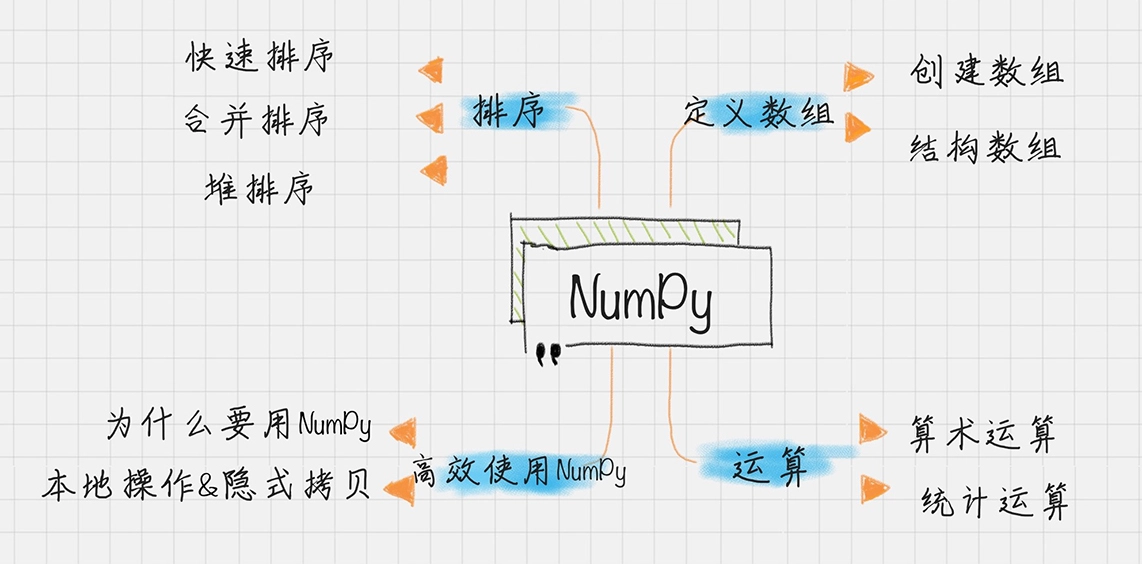

### 练习题

###### 假设一个团队里有 5 名学员，成绩如下表所示。你可以用 NumPy 统计下这些人在语文、英语、数学中的平均成绩、最小成绩、最大成绩、方差、标准差。然后把这些人的总成绩排序，得出名次进行成绩输出。

###### 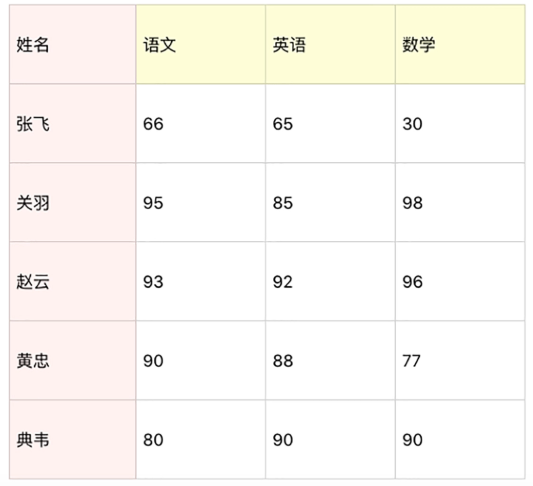

In [14]:
import numpy as np
a = np.array([[4,3,2],[2,4,1]])
print(np.sort(a))
print(np.sort(a, axis=None))
print(np.sort(a, axis=0))
print(np.sort(a, axis=1))

print("\n numpy练习题\n")

persontype = np.dtype({
    'names':['name', 'chinese','english','math' ],
    'formats':['S32', 'i', 'i', 'i']})
peoples = np.array([("ZhangFei",66,65,30),("GuanYu",95,85,98),
       ("ZhaoYun",93,92,96),("HuangZhong",90,88,77),
       ("DianWei",80,90,90)],dtype=persontype)
#指定的竖列
name = peoples[:]['name']
chinese = peoples[:]['chinese']
english = peoples[:]['english']
math = peoples[:]['math']
#定义函数用于显示每一排的内容
def show(name,cj):
    print('{} | {} | {} | {} | {} | {} '
          .format(name,np.mean(cj),np.min(cj),np.max(cj),np.var(cj),np.std(cj)))

print("科目 | 平均成绩 | 最小成绩 | 最大成绩 | 方差 | 标准差")
show("语文", chinese)
show("英语", english)
show("数学", math)

print("排名:")
#用sorted函数进行排序
ranking = sorted(peoples,key=lambda x:x[1]+x[2]+x[3], reverse=True)
print(ranking)

[[2 3 4]
 [1 2 4]]
[1 2 2 3 4 4]
[[2 3 1]
 [4 4 2]]
[[2 3 4]
 [1 2 4]]

 numpy练习题

科目 | 平均成绩 | 最小成绩 | 最大成绩 | 方差 | 标准差
语文 | 84.8 | 66 | 95 | 114.96000000000001 | 10.721940122944169 
英语 | 84.0 | 65 | 92 | 95.6 | 9.777525249264253 
数学 | 78.2 | 30 | 98 | 634.56 | 25.19047439013406 
排名:
[(b'ZhaoYun', 93, 92, 96), (b'GuanYu', 95, 85, 98), (b'DianWei', 80, 90, 90), (b'HuangZhong', 90, 88, 77), (b'ZhangFei', 66, 65, 30)]
